# Analysing results of all models
This notebook analyses the results of the DeepConvNet and Microstate models on the EEG data.
It visualizes the test accuracies across different subjects and study types.
Compares the performance of the models and provides insights into their effectiveness.
And verifies statistical significance of the results.


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="darkgrid")

# change directory go into Notebooks folder
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from lib import my_functions as mf
from lib import my_models as mm
from lib import my_stats_functions as msf

# Set pandas display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

## Loading all data

In [2]:
df_info = pd.read_csv('../Data/data_info.csv')
df_info.head()

subject  n_trials  n_open  n_rest  n_close
0        0       400     100     200      100
1        1       340      85     170       85
2        2       340      85     170       85
3        3       340      85     170       85
4        4       380      95     190       95

In [3]:
output_path = '../Output/ica_rest_all/'

print("🚀 Starting model results extraction...")
df, extracted_results = msf.run_complete_extraction(output_path)

🚀 Starting model results extraction...
🚀 Starting complete model results extraction...
📂 Reading from: ../Output/ica_rest_all/
💾 Results will be saved to: ../Output/ica_rest_all/results_all
🔍 Starting extraction from: ../Output/ica_rest_all/
📊 Configuration:
   Subject types: ['dependent', 'independent', 'adaptive']
   Cluster sizes: [5, 12]
   K-folds: 4
   dependent: 9 models
      ['dcn', 'msn', 'msn_embedded', 'multiscale_msn', 'multiscale_msn_embedded', 'dsn_msn', 'dsn_msn_embedded', 'dsn_multiscale_msn', 'dsn_multiscale_msn_embedded']
   independent: 5 models
      ['dcn', 'msn_embedded', 'multiscale_msn_embedded', 'dsn_msn_embedded', 'dsn_multiscale_msn_embedded']
   adaptive: 5 models
      ['dcn', 'msn_embedded', 'multiscale_msn_embedded', 'dsn_msn_embedded', 'dsn_multiscale_msn_embedded']

📁 Processing subject type: dependent
   ✅ dcn: Test Acc 77.94±9.78%
   ✅ msn_c5: Test Acc 61.67±11.66%
   ✅ msn_c12: Test Acc 63.69±9.52%
   ✅ msn_embedded_c5: Test Acc 63.77±9.55%
   ✅ msn

In [4]:
if df is not None:
    print("📊 Model Results DataFrame:")
    display(df)
else:
    print("❌ No results extracted!")

📊 Model Results DataFrame:


subject_type                   model_name  cluster_size  k_folds  \
22     adaptive                          dcn          <NA>        4   
25     adaptive             dsn_msn_embedded             5        4   
26     adaptive             dsn_msn_embedded            12        4   
24     adaptive                 msn_embedded            12        4   
23     adaptive                 msn_embedded             5        4   
0     dependent                          dcn          <NA>        4   
12    dependent             dsn_msn_embedded            12        4   
15    dependent  dsn_multiscale_msn_embedded             5        4   
11    dependent             dsn_msn_embedded             5        4   
10    dependent                      dsn_msn            12        4   
9     dependent                      dsn_msn             5        4   
13    dependent           dsn_multiscale_msn             5        4   
16    dependent  dsn_multiscale_msn_embedded            12        4   
14    dependent           dsn_multiscale_msn            12        4   
4     dependent                 msn_embedded            12        4   
3     dependent                 msn_embedded             5        4   
2     dependent                          msn            12        4   
8     dependent      multiscale_msn_embedded            12        4   
1     dependent                          msn             5        4   
7     dependent      multiscale_msn_embedded             5        4   
5     dependent               multiscale_msn             5        4   
6     dependent               multiscale_msn            12        4   
17  independent                          dcn          <NA>        4   
19  independent                 msn_embedded            12        4   
18  independent                 msn_embedded             5        4   
20  independent             dsn_msn_embedded             5        4   
21  independent             dsn_msn_embedded            12        4   

    n_subjects  is_loso  test_bal_acc_mean  test_bal_acc_std  test_f1_mean  \
22          50    False          88.085943         11.411299     87.191706   
25          50    False          72.894155         12.736551     70.289662   
26          50    False          70.996773         14.361715     69.366985   
24          50    False          61.508283         10.300691     50.183194   
23          50    False          59.046871         12.215666     47.464898   
0           50    False          77.944087          9.775789     73.071760   
12          50    False          77.916163         11.773324     76.731674   
15          50    False          77.347121         12.201908     76.287395   
11          50    False          77.144959         13.264771     75.794214   
10          50    False          76.715848         12.210337     75.949465   
9           50    False          76.419944         12.862979     75.334949   
13          50    False          75.990878         13.079801     74.943479   
16          50    False          75.952905         11.989206     74.776027   
14          50    False          73.279761         13.368494     72.626397   
4           50    False          64.297712          8.848545     55.817960   
3           50    False          63.767802          9.553690     53.986228   
2           50    False          63.694809          9.517008     56.825339   
8           50    False          62.771769          9.780292     52.766017   
1           50    False          61.665509         11.663688     55.841987   
7           50    False          61.030162         10.169144     52.390903   
5           50    False          60.790681         10.777992     56.083394   
6           50    False          59.635610         10.080902     56.571918   
17          50     True          75.529865         10.578037     71.859062   
19          50     True          56.350164         10.466637     43.163509   
18          50     True          46.160655         11.501792    

In [5]:
print("🔄 Checking experiment status...")
status = msf.show_experiment_status(extracted_results)

🔄 Checking experiment status...
🔄 EXPERIMENT STATUS OVERVIEW

📊 DEPENDENT Experiments:
   ✅ Completed: 17/17 (100.0%)
   ⏳ Missing:   0/17 (0.0%)

📊 INDEPENDENT Experiments:
   ✅ Completed: 5/9 (55.6%)
   ⏳ Missing:   4/9 (44.4%)
   📝 Missing models:
      - multiscale_msn_embedded_c5
      - multiscale_msn_embedded_c12
      - dsn_multiscale_msn_embedded_c5
      - dsn_multiscale_msn_embedded_c12

📊 ADAPTIVE Experiments:
   ✅ Completed: 5/9 (55.6%)
   ⏳ Missing:   4/9 (44.4%)
   📝 Missing models:
      - multiscale_msn_embedded_c5
      - multiscale_msn_embedded_c12
      - dsn_multiscale_msn_embedded_c5
      - dsn_multiscale_msn_embedded_c12

🔄 Overall Progress:
   27/35 experiments completed (77.1%)


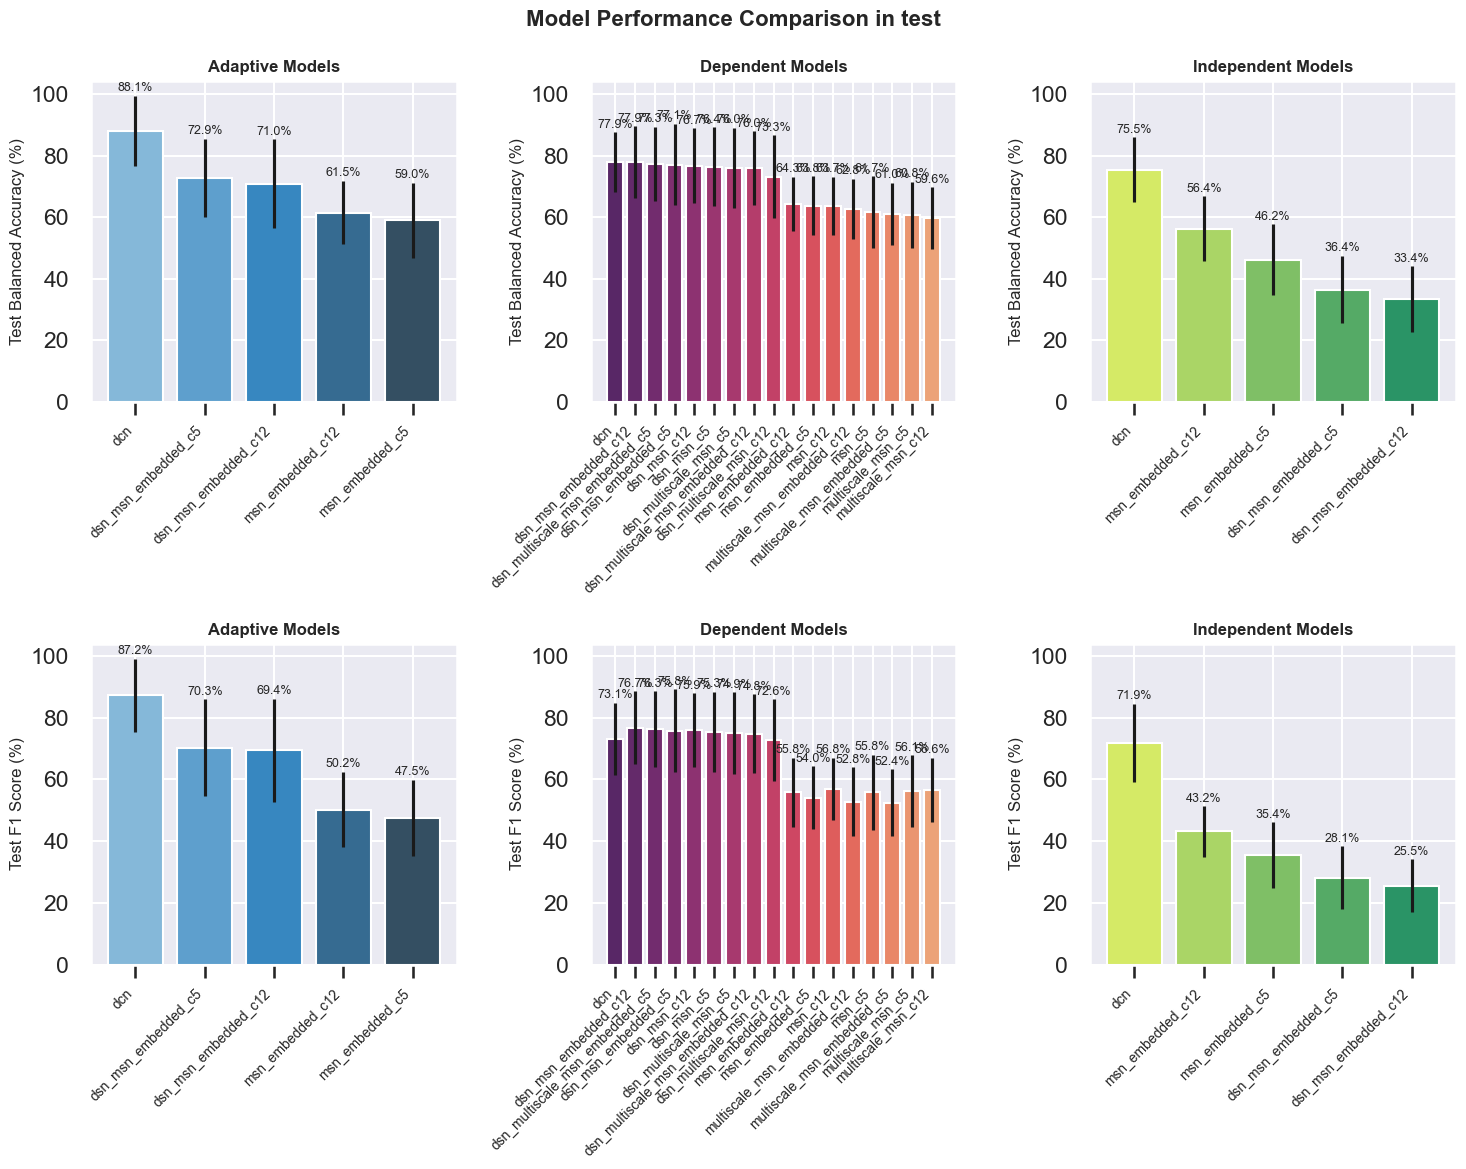

In [6]:
msf.plot_model_comparison(df, ['test_bal_acc', 'test_f1'])

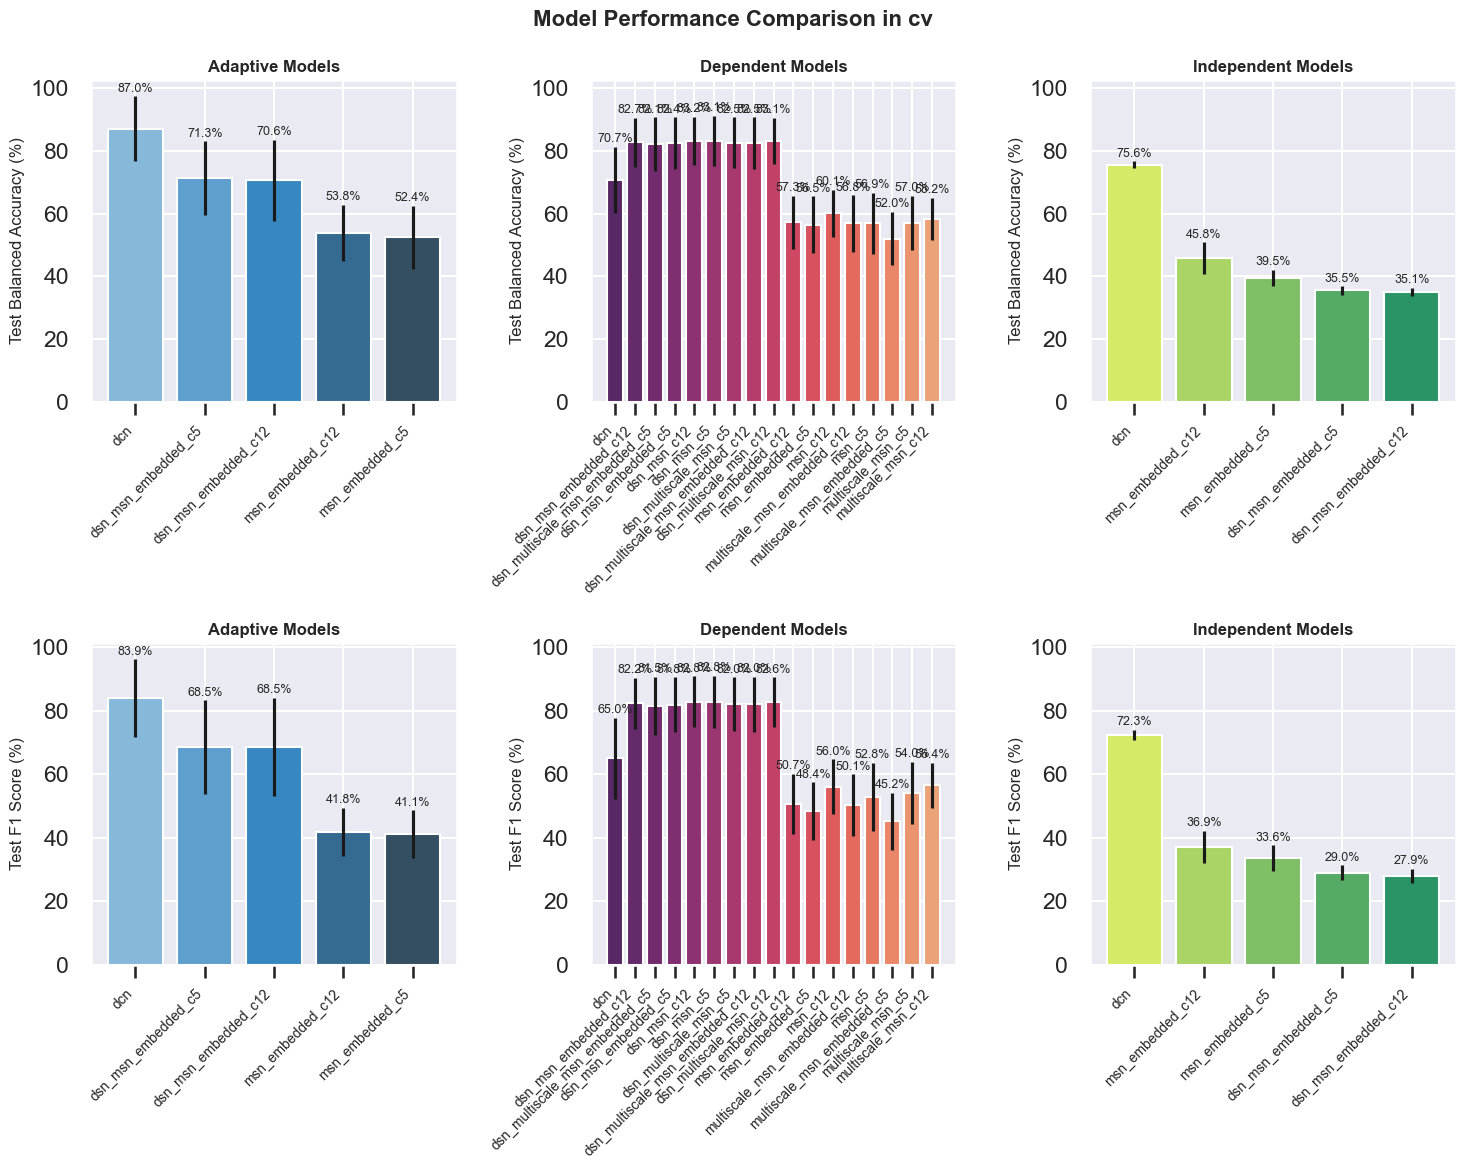

In [7]:
msf.plot_model_comparison(df, ['cv_bal_acc', 'cv_f1'], metric_type = 'cv')

## Test results

In [8]:
color_dict = msf.get_model_colors(df)
color_dict

{'dependent': {'dcn': (0.34315191, 0.15197275, 0.40074049),
  'dsn_msn_embedded_c12': (0.39398585, 0.16353554, 0.41740053),
  'dsn_multiscale_msn_embedded_c5': (0.44584668, 0.17360625, 0.43114133),
  'dsn_msn_embedded_c5': (0.49795686, 0.18380056, 0.43974881),
  'dsn_msn_c12': (0.55314129, 0.19655316, 0.44225723),
  'dsn_msn_c5': (0.60407977, 0.21017746, 0.43913439),
  'dsn_multiscale_msn_c5': (0.65530349, 0.22417381, 0.43207427),
  'dsn_multiscale_msn_embedded_c12': (0.70715842, 0.23808142, 0.42138647),
  'dsn_multiscale_msn_c12': (0.76214598, 0.25492998, 0.40539471),
  'msn_embedded_c12': (0.8079055, 0.27979128, 0.38647583),
  'msn_embedded_c5': (0.84470627, 0.31673295, 0.36907066),
  'msn_c12': (0.87199254, 0.3633634, 0.35974223),
  'multiscale_msn_embedded_c12': (0.89050882, 0.41601371, 0.36362102),
  'msn_c5': (0.90386248, 0.47447348, 0.38148746),
  'multiscale_msn_embedded_c5': (0.91262605, 0.52893336, 0.40749715),
  'multiscale_msn_c5': (0.91910675, 0.58281075, 0.43899817),
  'm

In [9]:
my_custom_style = {
    'line': {
        'marker': 'o',
        'markersize': 10,
        'linewidth': 2,
        'alpha': 0.8,
        'linestyle': ':'  # dashed lines
    },
    'scatter': {
        'marker': 'o',
        's': 40,
        'alpha': 0.7
    },
    'figure': {
        'context': 'talk',
        'figsize_2x3': (30, 16),
        'figsize_1x3': (24, 8),
        'suptitle_fontsize': 16,
        'title_fontsize': 14,
        'legend_fontsize': 10,
        'grid_alpha': 0.3
    }
}

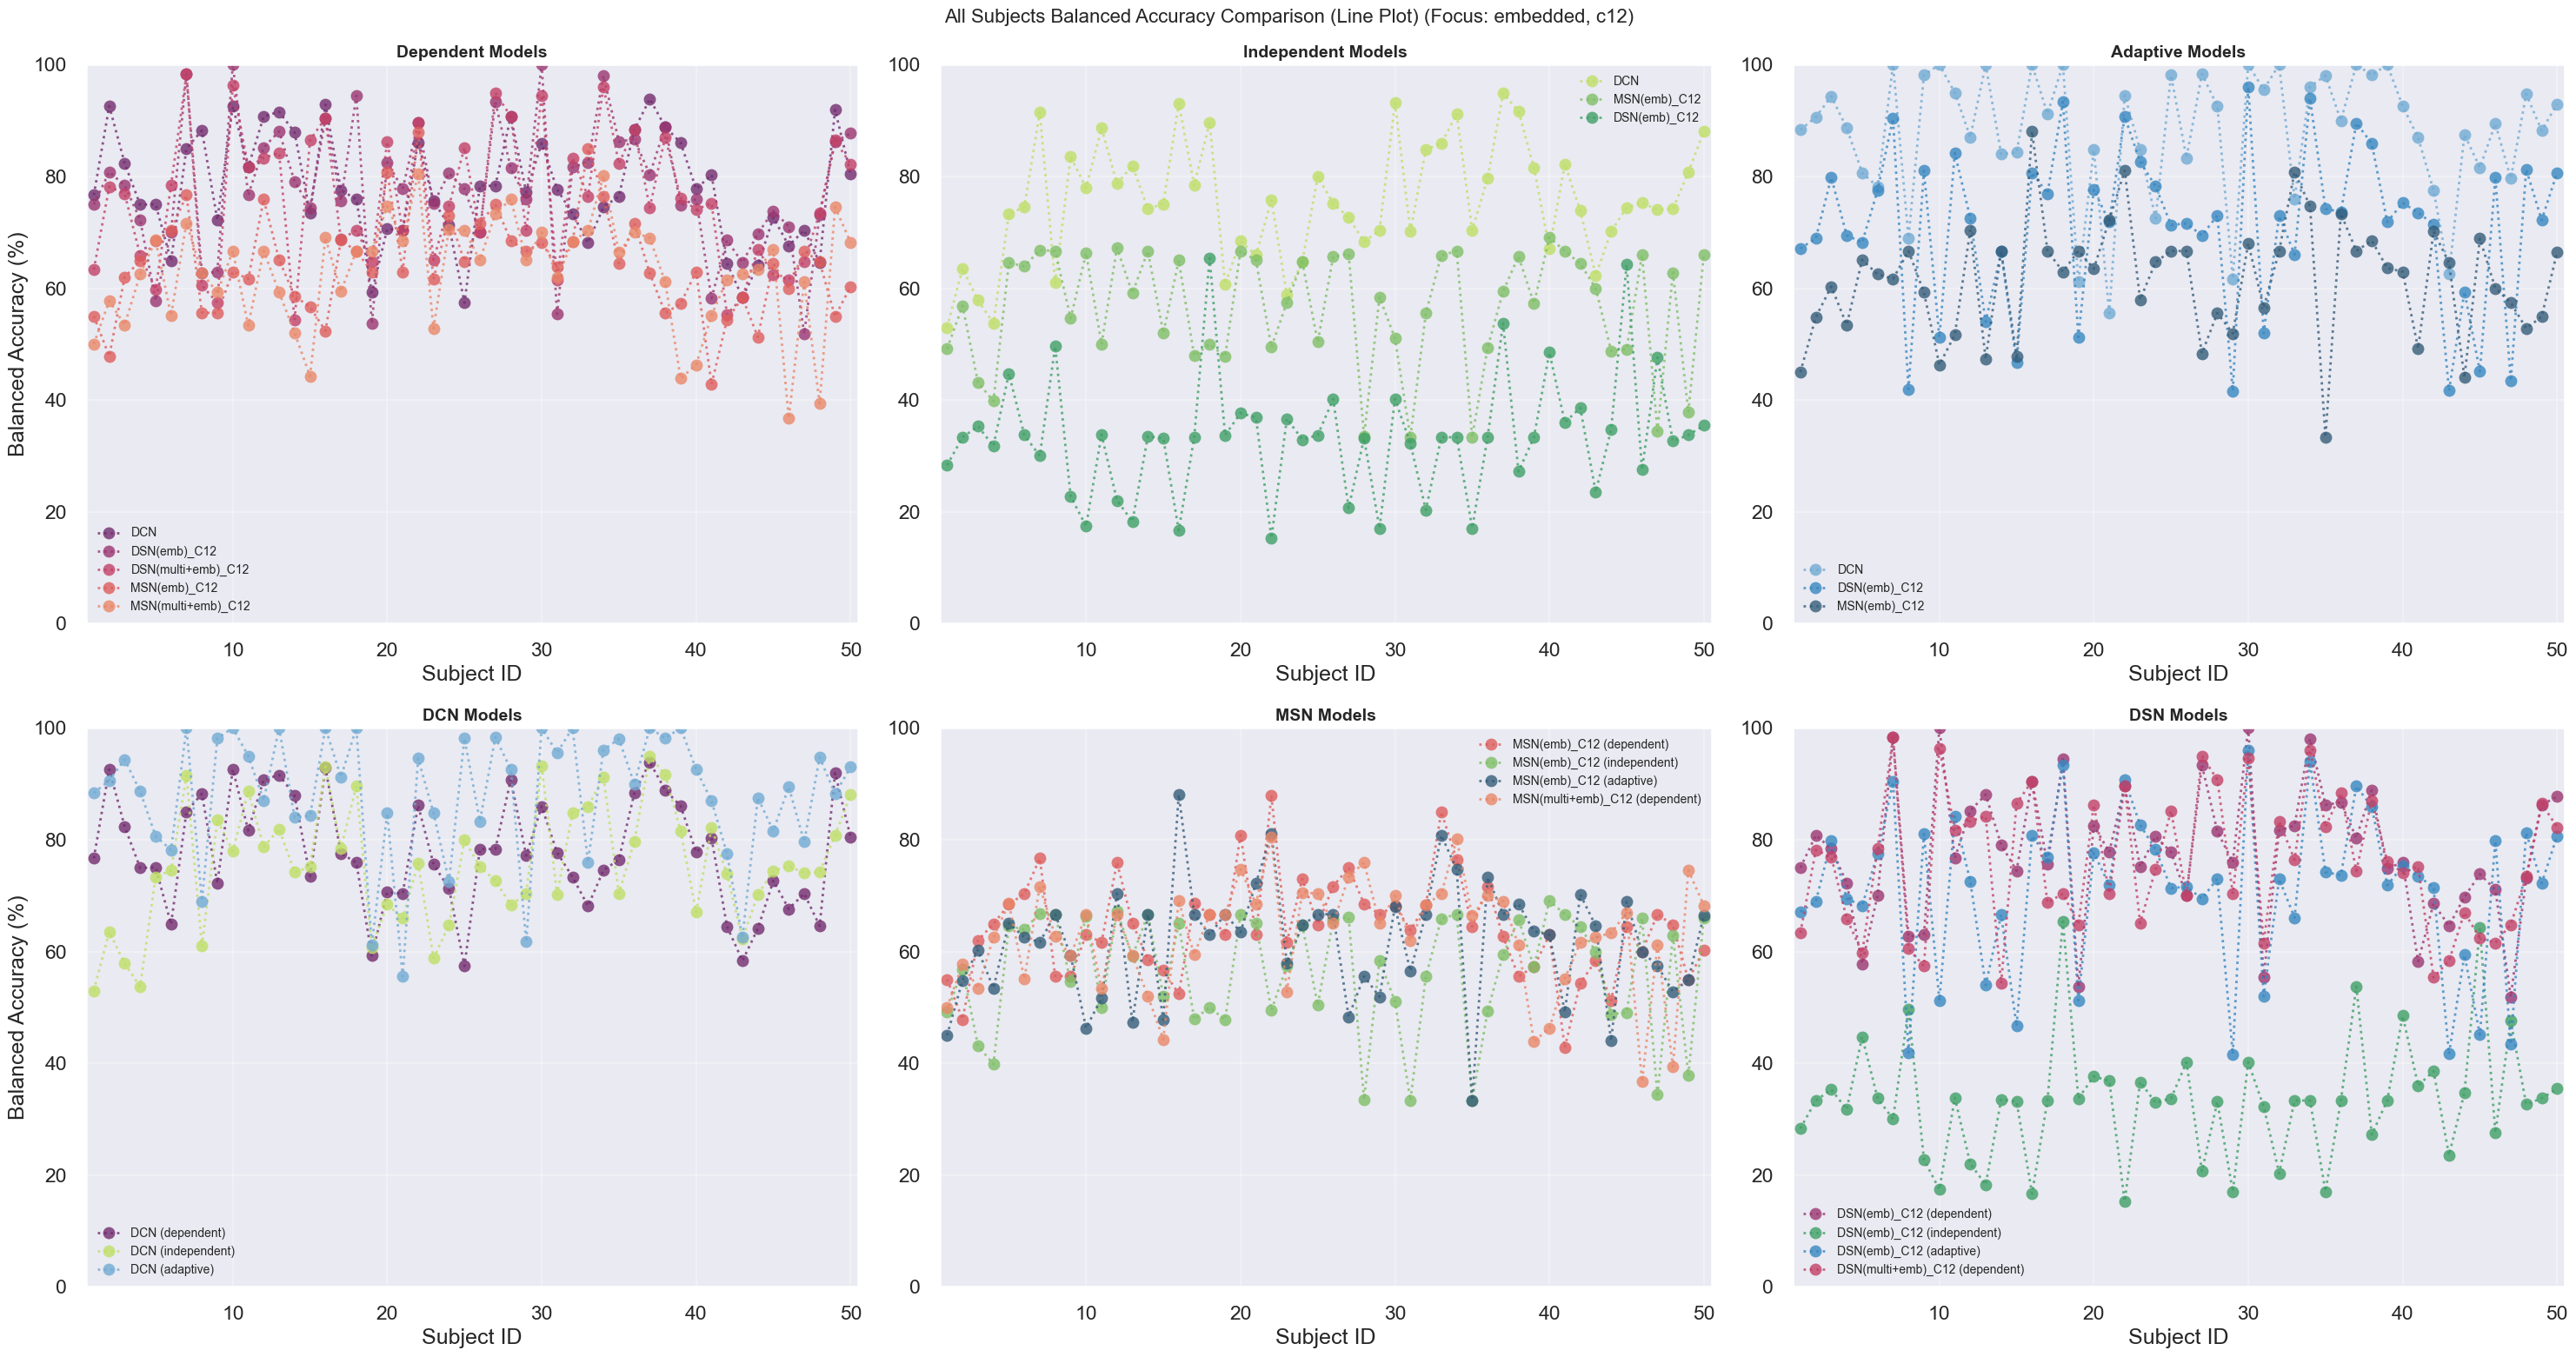

In [10]:
fig = msf.plot_subjects_line_comparison(df, focus_on=['embedded', 'c12'], plot_style=my_custom_style)

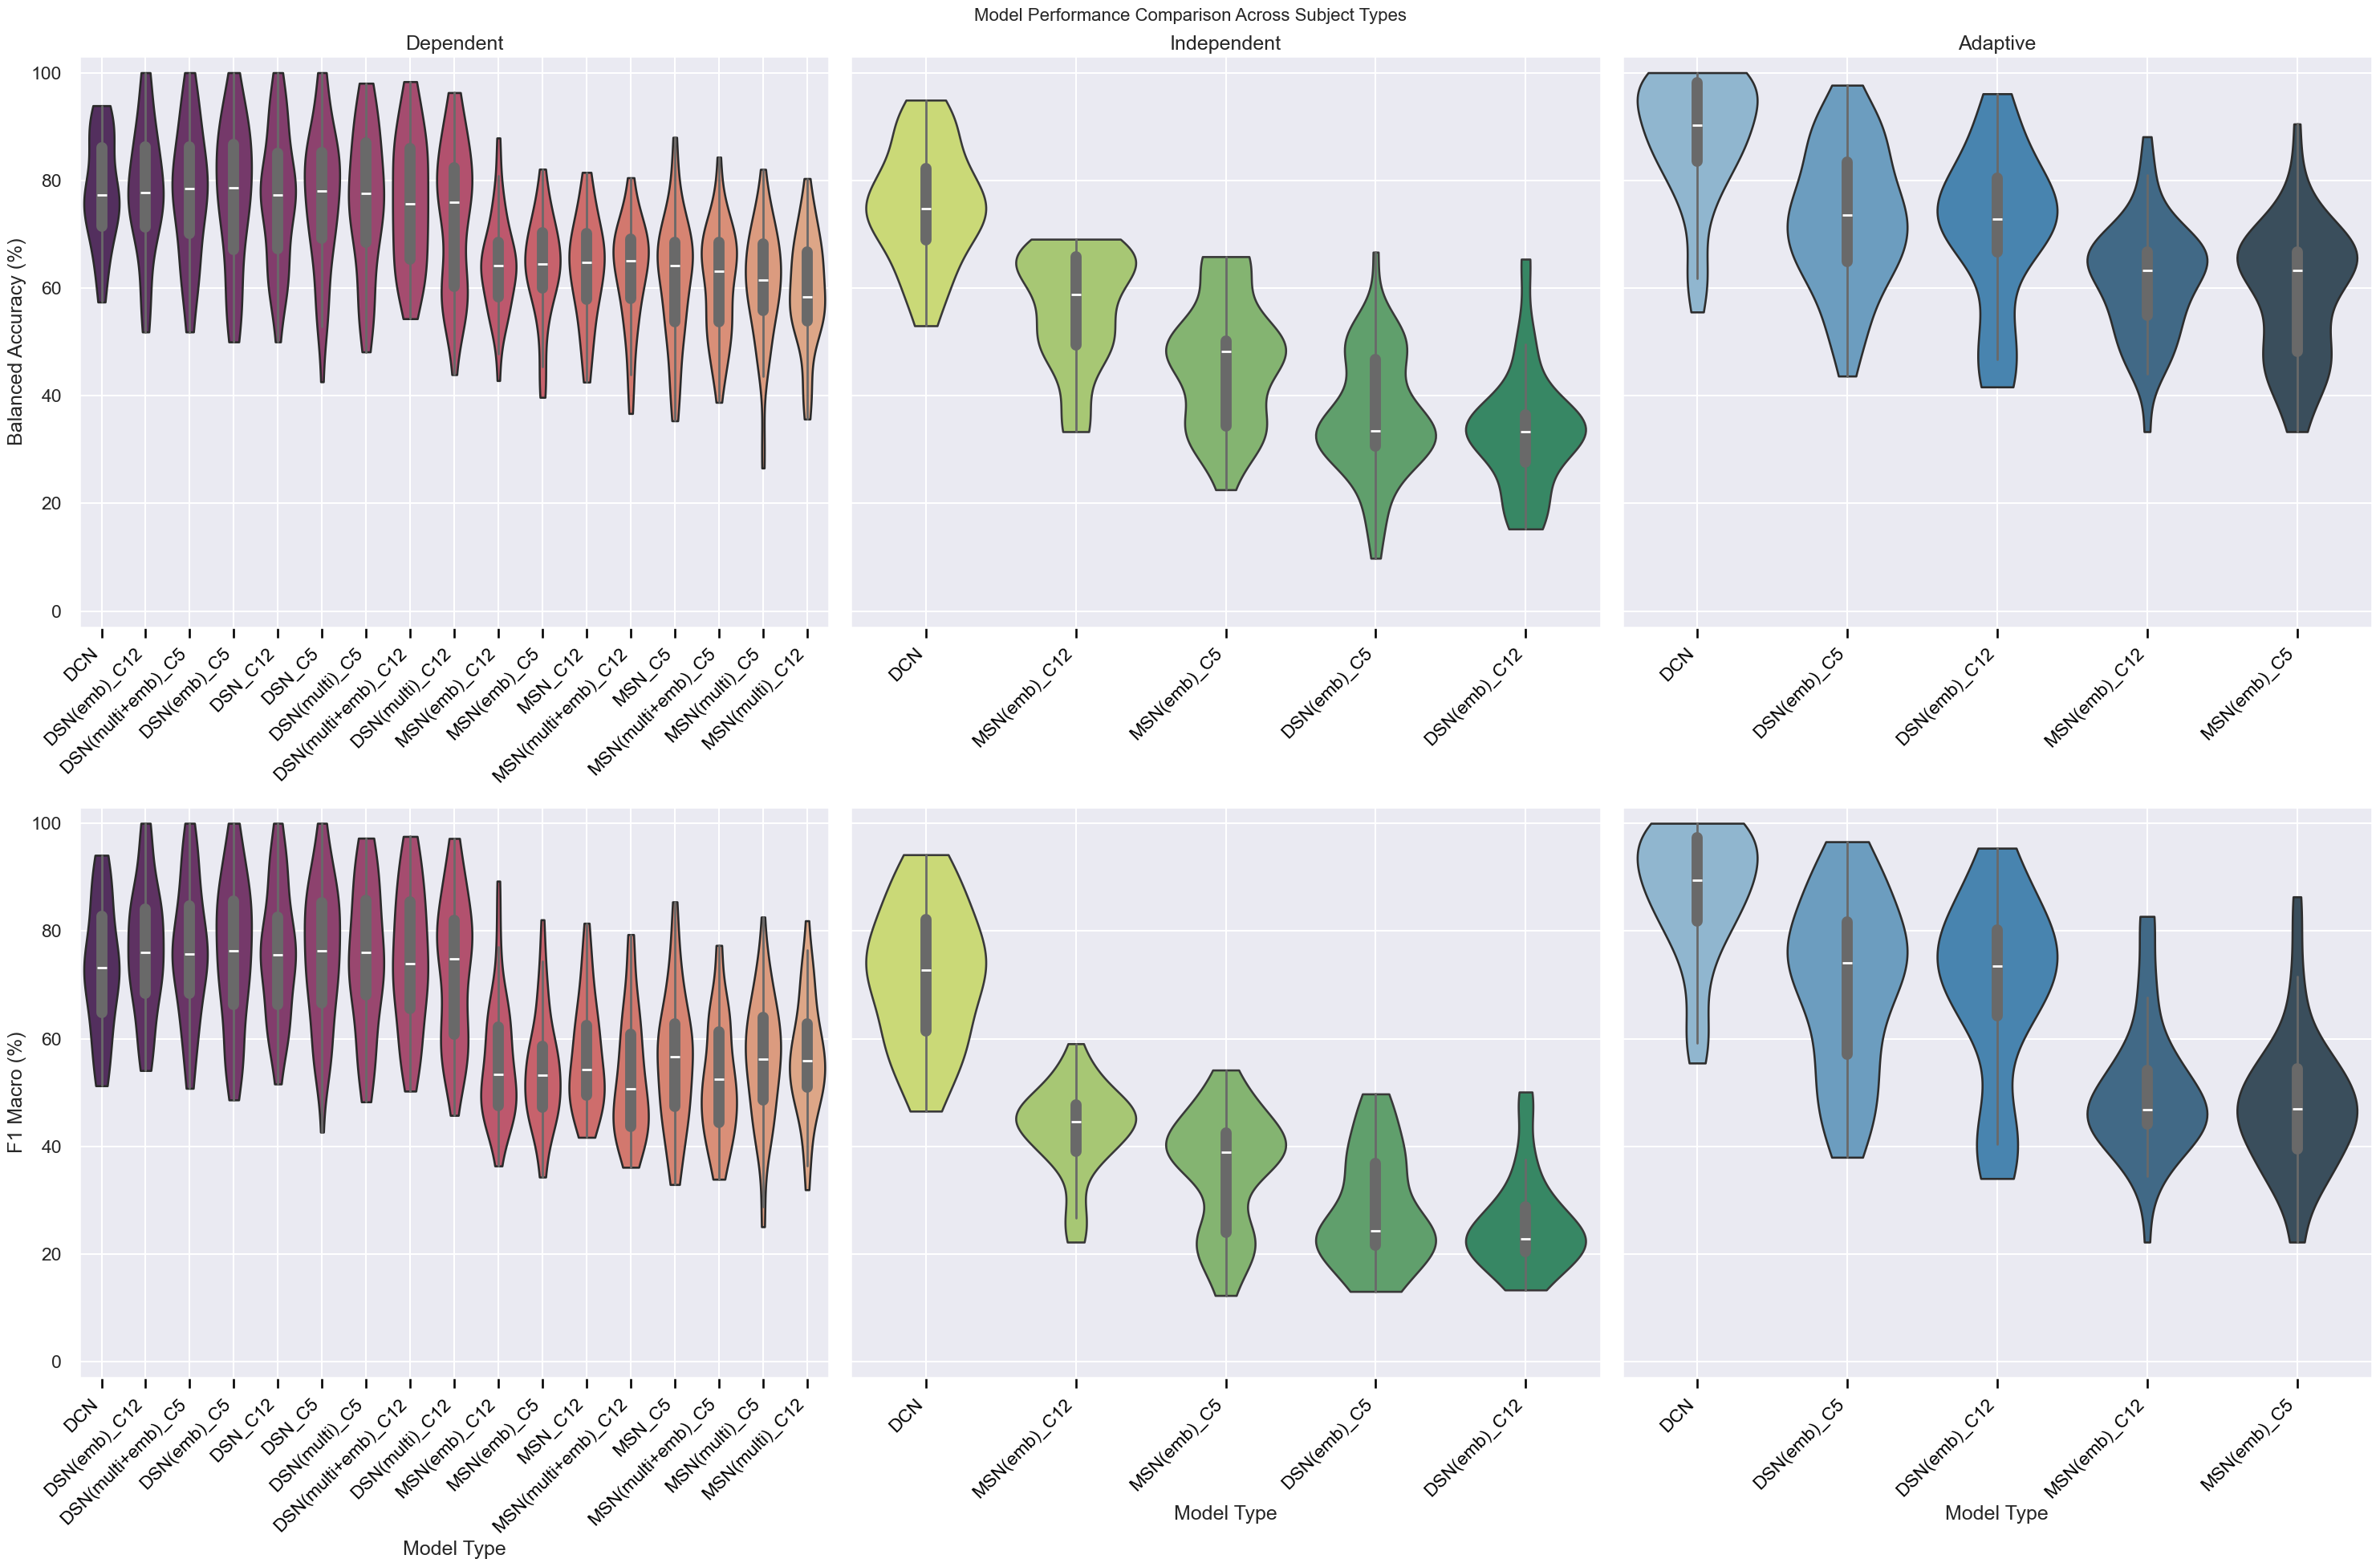

In [11]:
# Create the violin plot

msf.plot_violin_comparison(df)

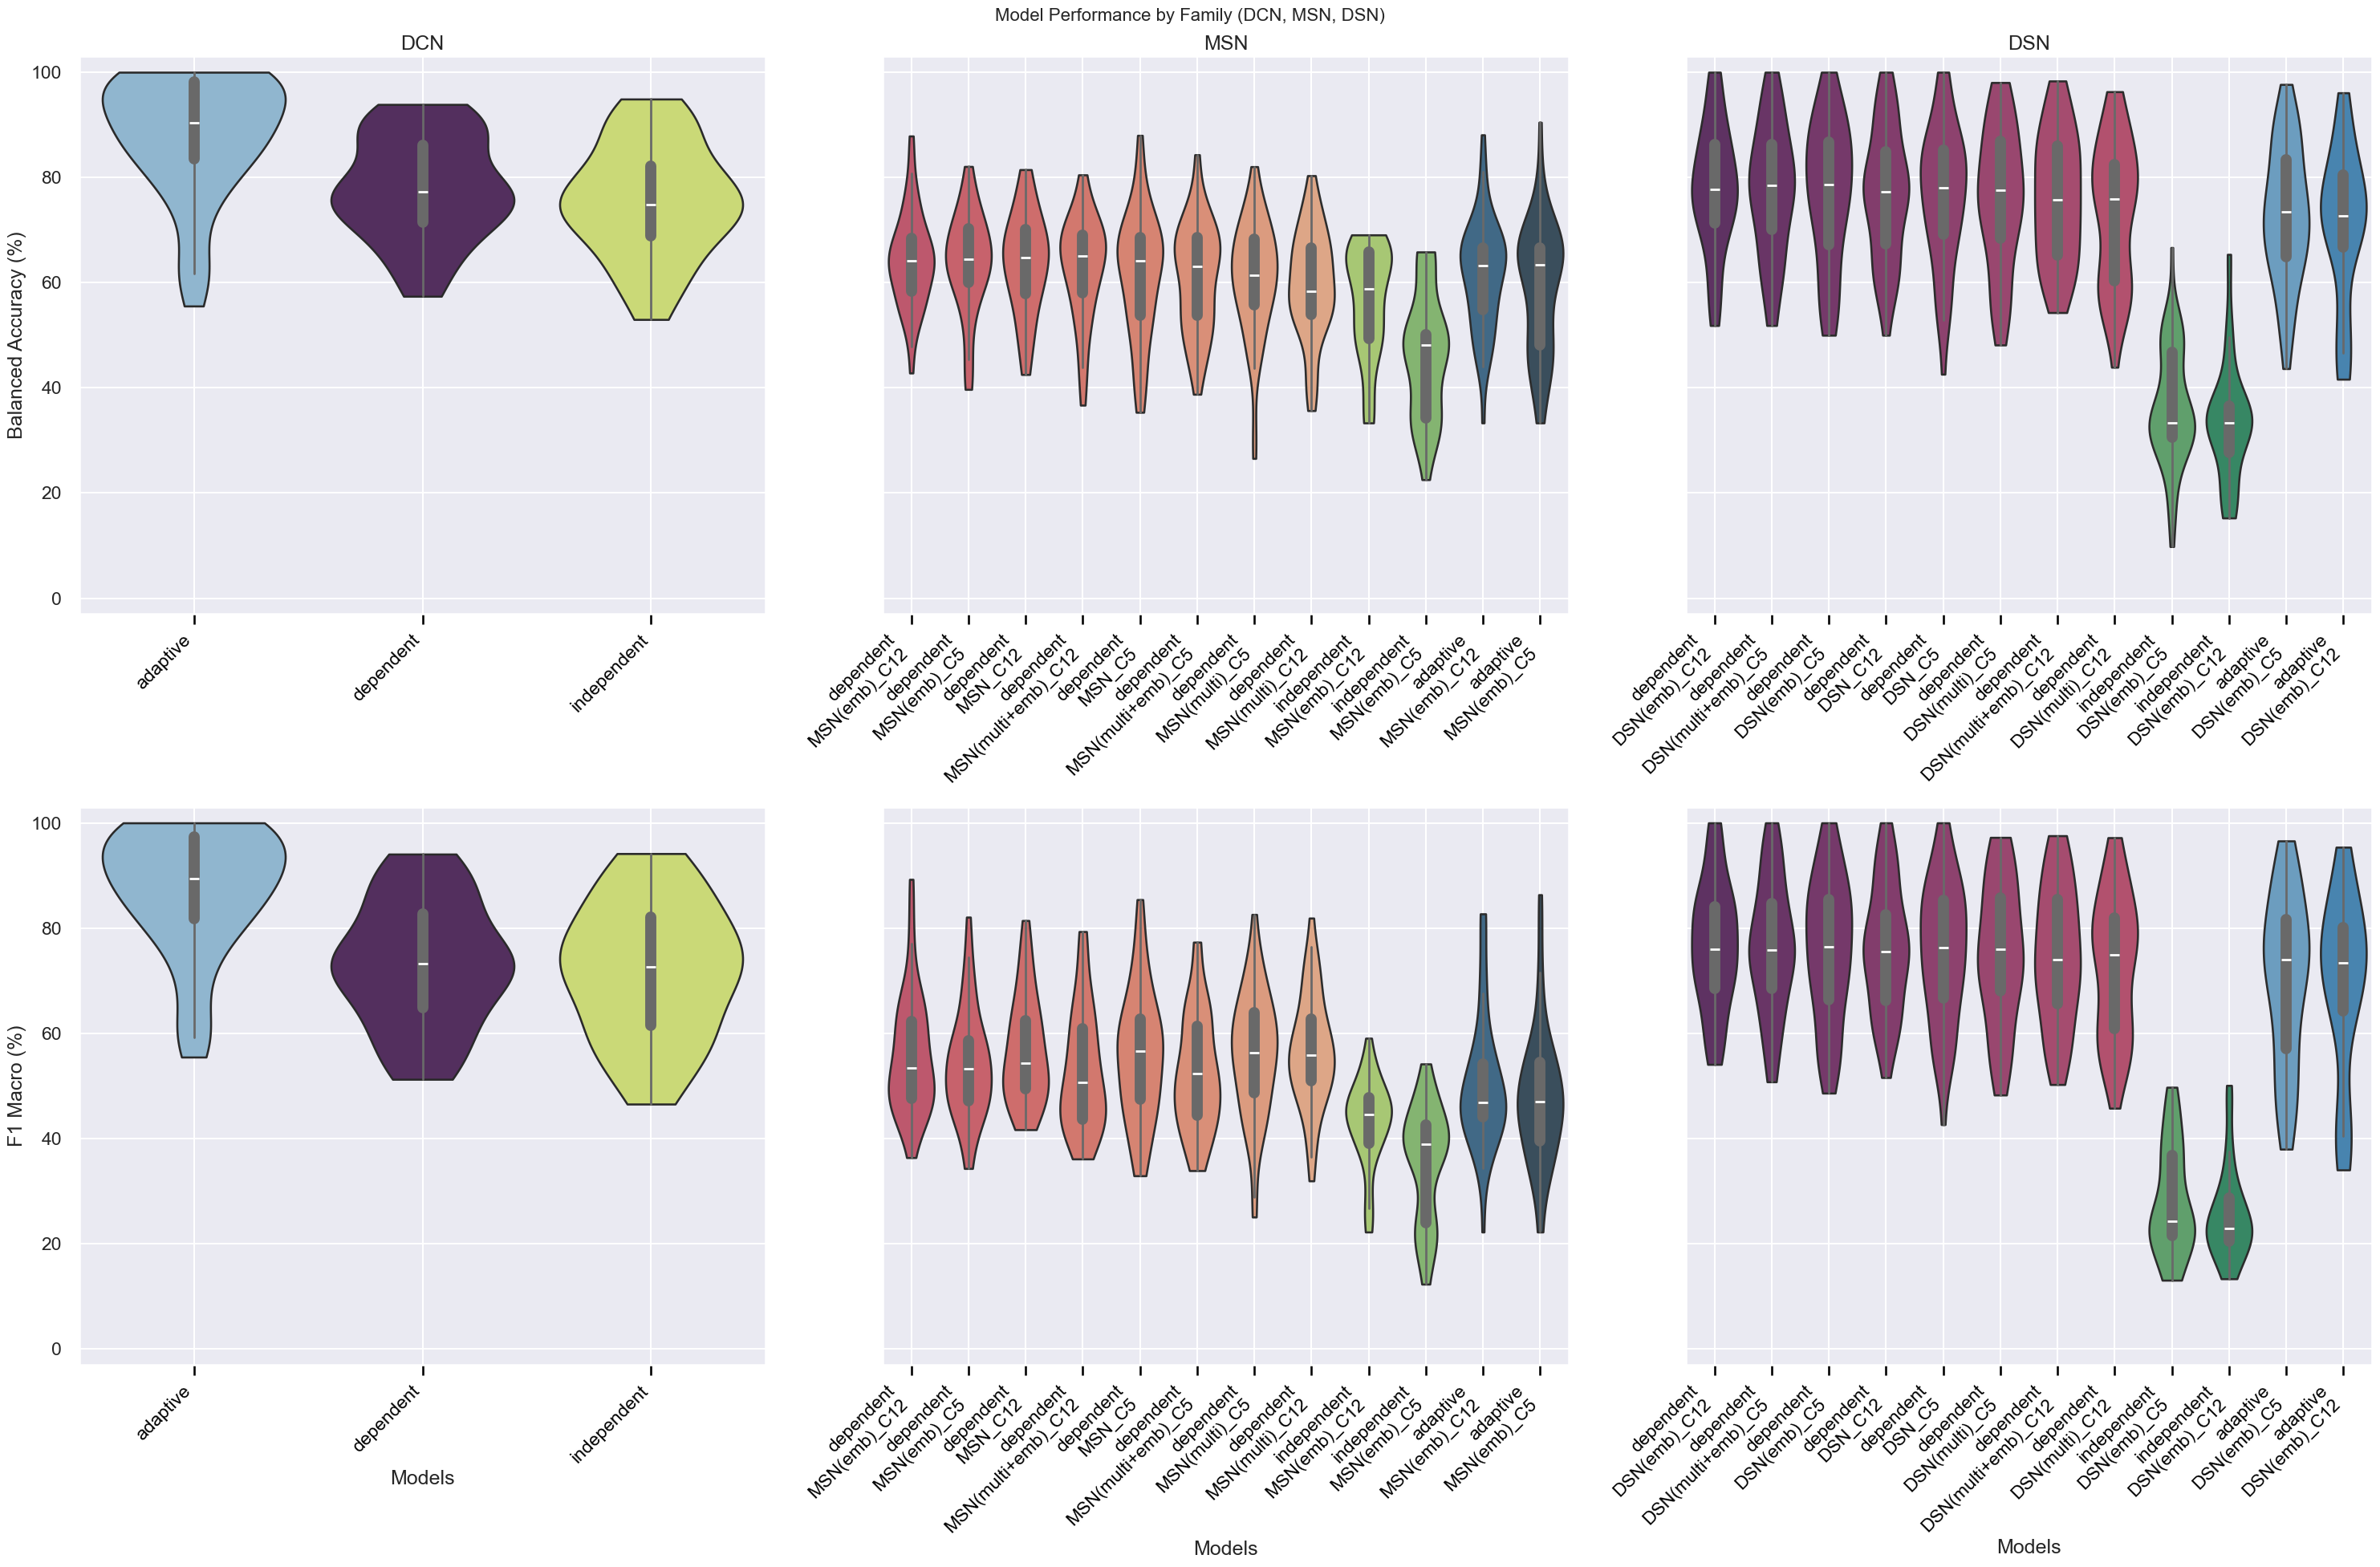

In [12]:
msf.plot_grouped_comparison(df)

## Comparing all type of studies

### Line plot of results

## Statistical significance of results

### Checking for statistical significance comparing model types within each study type

In [13]:
stats_output_path = '../Output/ica_rest_all/results_all/statistical_analysis/'

### Checking for significant differences between model types across all study types

### Power analysis

## Getting F1 macro scores for all models

### Plotting accuracy


#### Line plots

#### Violin plots

### F1 macro scores

## Statistical significance of results

In [14]:
stats_output_path = "../Output/ica_rest_all/results_all/statistical_analysis/"

In [15]:
# Run all three analyses
print("=== CLUSTER SIZE ANALYSIS ===")
cluster_results = msf.analyze_clusters(
    df, 
    metric='test_bal_acc_mean',
    save_plots=True,
    plot_dir=f"{stats_output_path}/cluster_analysis"
)

print("\n=== ENCODING TYPE ANALYSIS ===")
embedding_results = msf.analyze_embedding(
    df,
    metric='test_bal_acc_mean',
    save_plots=True,
    plot_dir=f"{stats_output_path}/encoding_analysis"
)

print("\n=== KERNEL SCALE ANALYSIS ===")
scale_results = msf.analyze_scales(
    df,
    metric='test_bal_acc_mean',
    save_plots=True,
    plot_dir=f"{stats_output_path}/scale_analysis"
)


=== CLUSTER SIZE ANALYSIS ===
🔍 CLUSTER SIZE COMPARISON ANALYSIS (5 vs 12)

📊 Overall Analysis (All Subject Types)
----------------------------------------
ANOVA: F=0.0159, p=0.9009
Effect size (η²): 0.0007 (Negligible)
Significant: No

Model-Specific Comparisons:
  ✗ dsn_multiscale_msn_embedded_c5 vs dsn_multiscale_msn_embedded_c12: p=1.0000, d=1.370 (Large)
  ✗ dsn_multiscale_msn_embedded_c5 vs dsn_multiscale_msn_embedded_c12: p=1.0000, d=-0.017 (Negligible)
  ✗ dsn_msn_embedded_c5 vs dsn_msn_embedded_c12: p=1.0000, d=-0.081 (Negligible)
  ✗ dsn_msn_embedded_c5 vs dsn_msn_embedded_c12: p=1.0000, d=0.060 (Negligible)
  ✗ dsn_multiscale_msn_embedded_c5 vs dsn_multiscale_msn_embedded_c12: p=nan, d=nan (Large)
  ✗ dsn_msn_embedded_c5 vs dsn_msn_embedded_c12: p=1.0000, d=0.048 (Negligible)
  ✗ dsn_multiscale_msn_embedded_c5 vs dsn_multiscale_msn_embedded_c12: p=1.0000, d=0.103 (Negligible)
  ✗ dsn_msn_embedded_c5 vs dsn_msn_embedded_c12: p=1.0000, d=-0.051 (Negligible)

📈 Analysis for ADA

In [16]:
# cluster_results = msf.analyze_clusters(df, 'test_bal_acc_mean')
# embedding_results = msf.analyze_embedding(df, 'test_bal_acc_mean') 
# scale_results = msf.analyze_scales(df, 'test_bal_acc_mean')

In [17]:
# For optimization
cluster_results = msf.optimization_analysis(df, 'cluster_size', output_path=stats_output_path)
arch_results = msf.optimization_analysis(df, 'architecture', output_path=stats_output_path)
encoding_results = msf.optimization_analysis(df, 'encoding', output_path=stats_output_path)

# For final analysis


AttributeError: module 'lib.my_stats_functions' has no attribute 'optimization_analysis'

🔄 Converting DataFrame to analysis format...
📊 Score format detected: Percentages (0-100)

FINAL ANALYSIS: DCN vs DSN vs MSN
Optimization choices: {'cluster_size': 12, 'architecture': 'multiscale', 'encoding': 'one-hot'}
Subject types: ['dependent', 'independent']
Alpha: 0.05
✅ DCN: 200 observations
✅ DSN: 100 observations
✅ MSN: 100 observations

🎯 Analyzing Balanced Accuracy

   📊 Overall Model Comparison:
      Descriptive Statistics:
        count    mean     std  median     min     max
family                                               
DCN       100  76.737  10.308  75.858  53.000  94.902
DSN        50  73.280  13.504  75.926  43.918  96.296
MSN        50  59.636  10.183  58.333  35.673  80.338
      ✅ One-way ANOVA: F = 39.894, p = 0.000000
      📏 η² = 0.288
      🔍 Post-hoc pairwise comparisons:
         ❌ DCN vs DSN: p=0.0838, d=0.302 (small)
         ✅ DCN vs MSN: p=0.0000, d=1.666 (large)
            🏆 DCN > MSN by 17.10pp
         ✅ DSN vs MSN: p=0.0000, d=1.141 (large)


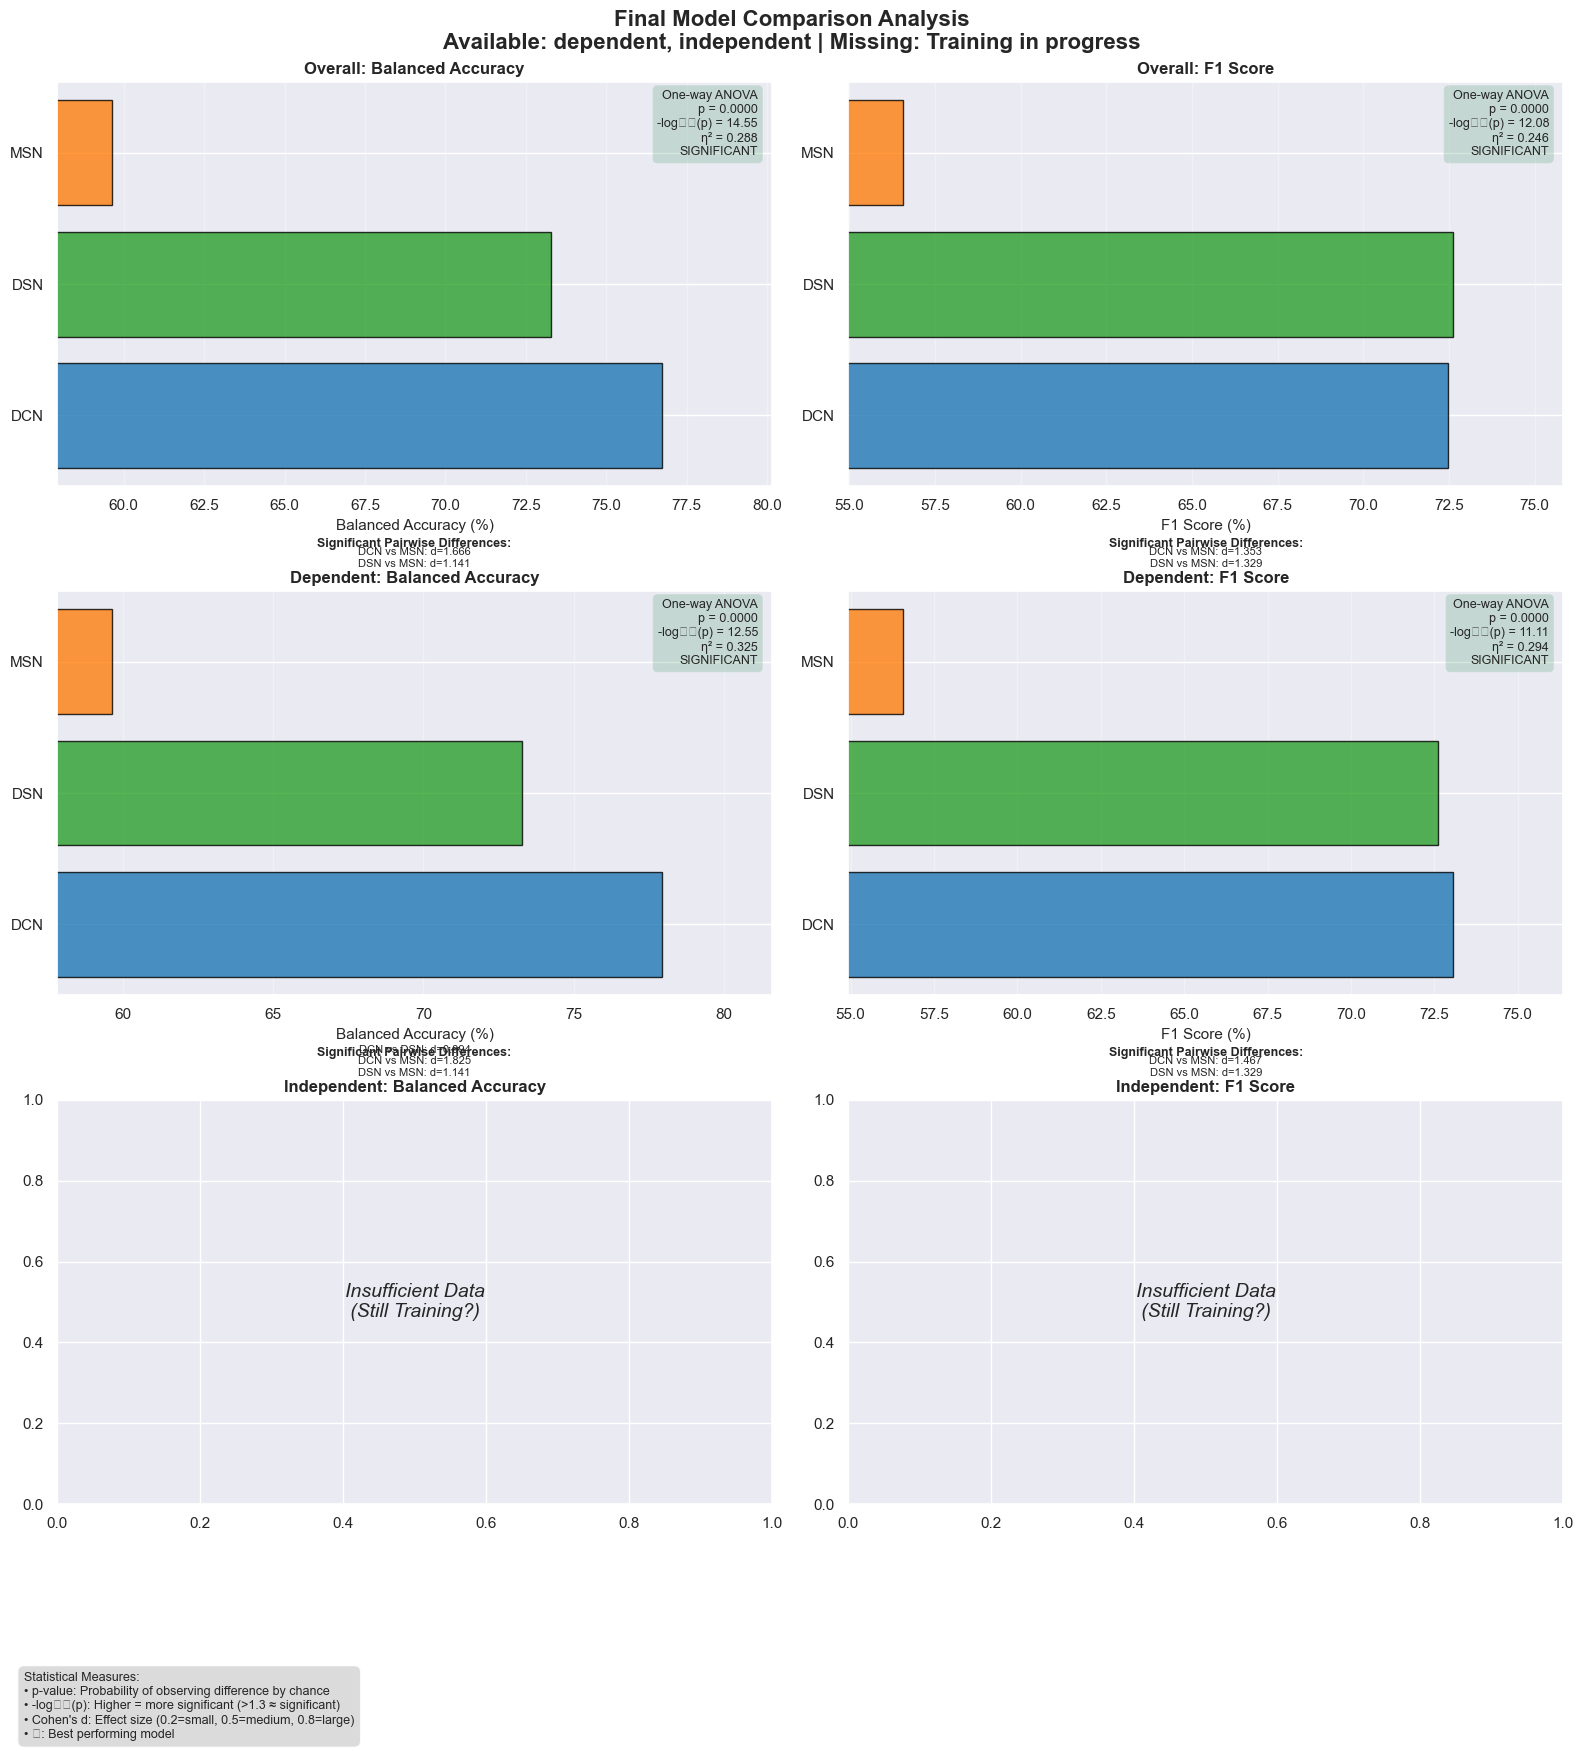

In [ ]:
# Based on optimization results
optimal_choices = {
    'cluster_size': 12,
    'architecture': 'multiscale', 
    'encoding': 'one-hot'
}

# Final scientific comparison
final_results = msf.final_analysis(df, optimal_choices, output_path=stats_output_path)

In [ ]:
# # Run the complete analysis
# results = msf.run_rigorous_eeg_analysis(
#     df=df, 
#     output_path=stats_output_path, 
#     base_alpha=0.05
# )

# # Access specific results
# model_comparisons = results['results']['balanced_accuracy']['models_within_subjects']
# cluster_effects = results['results']['balanced_accuracy']['cluster_effects']

### Accuracy

#### Model-wise

#### Subject-wise

### F1 macro scores

#### Model-wise

#### Subject-wise